## **FLO RFM İLE Müşteri Segmentasyonu**


Online ayakkabı mağazası olan FLO müşterilerini segmentlere ayırıp bu segmentlere göre pazarlama stratejileri belirlemek istiyor. Buna yönelik olarak müşterilerin davranışları tanımlanacak ve bu davranışlardaki öbeklenmelere göre gruplar oluşturulacak.

- master_id = Eşsiz müşteri numarası
- order_channel = Alışverişyapılan platforma ait hangi kanalın kullanıldığı (Android, ios, Desktop, Mobile)
- last_order_channel = En son alışverişin yapıldığı kanal
- first_order_date = Müşterinin yaptığı ilk alışveriştarihi
- last_order_date = Müşterinin yaptığı son alışveriştarihi
- last_order_date_online = Müşterinin online platformda yaptığı son alışveriştarihi
- last_order_date_offline = Müşterinin offline platformda yaptığı son alışveriştarihi
- order_num_total_ever_online = Müşterinin online platformda yaptığı toplam alışverişsayısı
- order_num_total_ever_offline = Müşterinin offline'da yaptığı toplam alışverişsayısı
- customer_value_total_ever_offline = Müşterinin offline alışverişlerinde ödediği toplam ücret
- customer_value_total_ever_online = Müşterinin online alışverişlerinde ödediği toplam ücret
- interested_in_categories_12 = Müşterinin son 12 ayda alışveriş yaptığı kategorilerin listesi



****Veriyi Hazırlama****

- Öncelikle analizini yacapacağımız veri setimiz için gerekli olan kütüphaneleri içeri aktaralım. Sonrasında ise veri setimizi içeri aktarma işlemini gerçekleştirelim. 

In [23]:
import datetime as date
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", (lambda x: "%.5f" %x))

In [2]:
data = pd.read_csv(r"C:\Users\HP\OneDrive\Masaüstü\FLO_RFM_Analizi\flo_data_20k.csv")
data_copy = data.copy()

In [3]:
data.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.00000,1.00000,139.99000,799.38000,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.00000,2.00000,159.97000,1853.58000,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.00000,2.00000,189.97000,395.35000,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.00000,1.00000,39.99000,81.98000,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.00000,1.00000,49.99000,159.99000,[AKTIFSPOR]


- Veri Setimizde online ve offline olarak bulunan "Toplam Satış Sayısı" ve "Toplam Ürün Satış Fiyatı" sütunlarını birleştirelim. Sonrasında veri setimiz ile ilgili ön bilgi edinmek için sırasıyla işlemlerimizi gerçekleştirelim. 

In [4]:
data["Total_Order"] = data["order_num_total_ever_online"] +  data["order_num_total_ever_offline"]
data["Total_Value"]  = data['customer_value_total_ever_offline'] + data['customer_value_total_ever_online']

In [ ]:
data.columns

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
data.describe().T

In [ ]:
data.nunique()

In [ ]:
data.info()

Veri setimizde bulunan zamansal sütunların hepsinin veri tipi "object" olarak kaydedilmiş. Bunları "date" veri tipine dönüştürmemiz gerekmektedir. 

In [ ]:
date_columns = [col for col in data.columns if "date" in col]
data[date_columns] = data[date_columns].apply(lambda x: pd.to_datetime(x, infer_datetime_format=True))

In [ ]:
data.info()

Müşterilerimizin hangi kanallardan daha çok alışveriş yaptıklarını görmek ve buna göre yorum yapmak için bir groupby() işlemi gerçekleştiriyoruz. 

In [8]:
data.groupby("order_channel").agg({"master_id": "count",
                                    "Total_Order": "sum", 
                                    "Total_Value": "sum"}).sort_values("Total_Value",ascending=False).head(10)

,master_id,Total_Order,Total_Value
order_channel,,,
Android App,9495,52269.00000,7819062.76000
Mobile,4882,21679.00000,3028183.16000
Ios App,2833,15351.00000,2525999.93000
Desktop,2735,10920.00000,1610321.46000


Grafikten de göreceğimiz gibi  kullanıcılarımız yoğunluklu olarak mobil uygulama üzerinden alışveriş yapmışlardır. 

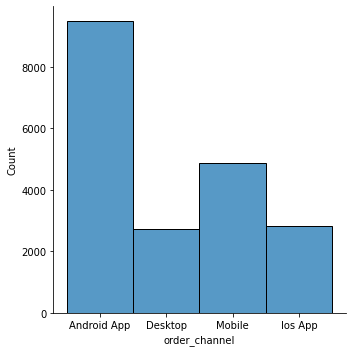

In [35]:
sns.displot(data["order_channel"])

In [38]:
data.groupby("master_id").agg({"Total_Value":"sum", 
                               "Total_Order":"sum"}).sort_values("Total_Value",ascending=False)

,Total_Value,Total_Order
master_id,,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.10000,202.00000
d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,36818.29000,68.00000
73fd19aa-9e37-11e9-9897-000d3a38a36f,33918.10000,82.00000
7137a5c0-7aad-11ea-8f20-000d3a38a36f,31227.41000,11.00000
47a642fe-975b-11eb-8c2a-000d3a38a36f,20706.34000,4.00000
...,...,...
1af373d6-acbf-11e9-a2fc-000d3a38a36f,55.18000,2.00000
0dd9a790-7d63-11ea-80af-000d3a38a36f,53.47000,2.00000
1e2dd6cc-0b1e-11eb-8ffc-000d3a38a36f,49.98000,2.00000


In [ ]:
data.sort_values("Total_Value", ascending=False)

In [59]:
data.groupby("master_id").agg({"Total_Value":"sum", 
                               "Total_Order":"sum"}).sort_values("Total_Order",ascending=False)

,Total_Value,Total_Order
master_id,,
5d1c466a-9cfd-11e9-9897-000d3a38a36f,45905.10000,202.00000
cba59206-9dd1-11e9-9897-000d3a38a36f,12282.24000,131.00000
a57f4302-b1a8-11e9-89fa-000d3a38a36f,10383.44000,111.00000
fdbe8304-a7ab-11e9-a2fc-000d3a38a36f,8572.23000,88.00000
329968c6-a0e2-11e9-a2fc-000d3a38a36f,4240.36000,83.00000
...,...,...
2db9812c-a125-11e9-a2fc-000d3a38a36f,299.98000,2.00000
ab404e04-1660-11ea-aa74-000d3a38a36f,220.86000,2.00000
ab33f8fc-1358-11eb-8ffc-000d3a38a36f,325.96000,2.00000


Özet olarak yukarıda yaptığımız tüm işlemleri bir fonksiyon haline getirelim. 

In [ ]:

def data_preperation(dataframe,head=10): 
    
    dataframe.head()
    dataframe.info()
    dataframe.describe().T
    dataframe.isnull().sum()
    
    
    dataframe["order_num_total_ever_omnichannel"] = dataframe["order_num_total_ever_online"] + dataframe["order_num_total_ever_offline"]
    dataframe["customer_value_total_ever_omnichannel"] = dataframe["customer_value_total_ever_online"] + dataframe["customer_value_total_ever_offline"]
    
    
    date_columns = [col for col in dataframe.columns if "date" in col] 
    dataframe[date_columns] = dataframe[date_columns].apply(lambda x: pd.to_datetime(x, infer_datetime_format=True))
    
    dataframe.groupby("order_channel").agg({"master_id": "count",
                                            "order_num_total_ever_omnichannel": "sum",
                                            "customer_value_total_ever_omnichannel" : "sum"})
   
    dataframe.groupby("order_channel").agg({"order_num_total_ever_omnichannel": "sum"}).sort_values("order_num_total_ever_omnichannel", ascending=False).head()
    
    
    dataframe.groupby("order_channel").agg({"customer_value_total_ever_omnichannel": "sum"}).sort_values("customer_value_total_ever_omnichannel", ascending=False).head()
    
    return dataframe


data_preperation(data_copy)
    
    


## **RFM Metriklerinin Belirlenmesi**

RFM analizi müşteri segmentasyonu yapmamıza yarayan bir tekniktir. Daha da açacak olursak konuyu, şirketler müşterilerinin satın alma alışkanlıkları üzerinden gruplara ayırarak yeni stratejiler geliştirmelerine olanak sağlar.

Şirketler yaptıkları bu analiz ile birlikte müşterileri için her gruba uygun farklı indirimler uygulayabilir yada satın almalarını kolaylaştıracak farklı stratejiler geliştirebilir.

RFM kelimesi farklı kelimelerin baş harflerinin birleşmesinden oluşmuştur. Bunlar Recency, Frequency ve Monetary kelimeleridir. Her kelime aslında RFM içinde müşteri ile ilgili bilgiler verir.

**Recency**: Kelime anlamı olarak “Yenilik” anlamını taşır. Müşterilerinizin, ürününüzü son satın almasından itibaren geçen süre için kullanılır. Bunun hesaplanması da analize başladığınız günü baz alarak hesaplanır. Müşteri ne kadar yeni satın alım yaptıysa sizin için o kadar iyidir.

**( Formül = Analizin Yapıldığı Tarih — Son Satın Alma Tarihi )**

**Frequency**: Kelime anlamı olarak “Sıklık” anlamına gelmektedir. Müşterinin sizinle ne kadar çok satın alım işleminde bulunduğunu gösteren parametredir. Müşteri ne kadar çok satın alma işlemi yaptıysa şirket için o kadar önemlidir.

**Monetary**: Kelime anlamı olarak “Parasal Değer” anlamına gelmektedir. Müşterinin yaptığı işlem ücretlerinin toplamını gösteren parametredir. Müşterinin yaptığı işlemlere bağlı olarak yatırdığı para ne kadar çok ise şirket içinde değeri o kadar yüksektir.

In [ ]:

last_purchase = data.last_order_date.max()
last_purchase

In [ ]:
today_date = date.datetime(2021,6,1)
today_date

In [ ]:
RFM = data.groupby("master_id").agg({"last_order_date": lambda last_order_date:( today_date - last_order_date.max()).days, 
                               "Total_Order": lambda y: y, 
                               "Total_Value": lambda x: x})

In [ ]:
RFM.columns = ["Recency","Frequency","Monetary"]
RFM.head()

In [ ]:
RFM["Recency_Score"] = pd.qcut(RFM["Recency"], 5, [5,4,3,2,1])
RFM["Frequency_Score"] = pd.qcut(RFM["Frequency"].rank(method="first"), 5, [1,2,3,4,5])
RFM["Monetary_Score"] = pd.qcut(RFM["Monetary"], 5, [1,2,3,4,5])

In [ ]:
RFM.head()

In [ ]:
RFM["RFM_Score"] = RFM["Recency_Score"].astype(str) + RFM["Frequency_Score"].astype(str)

In [ ]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}


In [ ]:
RFM["segment"] = RFM["RFM_Score"].replace(seg_map, regex=True)


In [ ]:
RFM.groupby("segment").agg(["mean", "count"])

In [ ]:
segment_id = RFM[(RFM["segment"] == "champions") | (RFM["segment"] == "loyal_customers")].index
segment_id 


In [ ]:
segment_id_data = data[pd.Series([x in segment_id for x in data["master_id"]])]
segment_id_data = segment_id_data.to_csv("segment_id_data.csv")

In [ ]:
segment_id = RFM[(RFM["segment"] == "about_to_sleep") | (RFM["segment"] == "new_customers")].index
segment_id


In [ ]:
segment_id_data = data[pd.Series(x in segment_id for x in data["master_id"])]
segment_id_data = segment_id_data.to_csv("segment_id_data1.csv")